<a href="https://colab.research.google.com/github/yashika51/Preprocessing_and_Analysis/blob/master/Preprocessing_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zapytaj supervised multi-label classification

In order to analyze the effects of sex-education in Poland we searched for different platforms for data and found Zapytaj to be very useful.

Zapytaj is a question and answer platform based in Poland. There are multiple categories, tutorials, answers and quizzes. Since this platform is mainly popular among teenagers in Poland we decided to use this for scraping relevant data for our task.
Our dataset consists of title(of the question),description in Polish and their corresponding title_en, decription_en with translated text to English, type of the question, data posted and some other columns.


## Importing the necessary libraries

In [0]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import nltk
import re
import string
from nltk import sent_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from nltk.corpus import stopwords

In [0]:
#setting display settings
sns.set(rc={'figure.figsize':(11.7,8.27)})
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_colwidth', -1)

In [0]:
#downloading tokenizer and stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
#mounting drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
sys.path.append('/content/gdrive/My Drive/Official folder Sexed challenge/Task4_1_forum_platforms_scraping/most_recent_data/')

In [0]:
import os
os.listdir("/content/gdrive/My Drive/Official folder Sexed challenge/Task4_1_forum_platforms_scraping/most_recent_data")

['dojrzewamy_new.csv',
 'dojrzewamy_new.gsheet',
 'outdated - to be deleted TBC',
 'zapytaj_1_8_20.gsheet',
 'zapytaj_PL.xlsx',
 'augmented_data_PL.csv',
 'dojrzewamy_new_w_eng.csv',
 'augmented_data.csv',
 'dojrzewamy_new_w_eng.gsheet',
 'tfhub_modules',
 'augmented_data_multilabelPL.csv',
 'exporter',
 'Categories master list.gdoc',
 'augmented_data_multilabel_flair_modif.xlsx',
 'augmented_data_multilabel_flairPL.csv',
 'augmented_data_multilabel_flairPL (1).csv',
 'augmented_data_multilabel.gsheet',
 'zapytaj_1_8_20.xlsx',
 'augmented_data (1).csv',
 'augmented_data_multilabel_flair.csv',
 'augmented_data_multilabel.csv',
 'augmented_data_multilabel_sum.csv',
 'augmented_data_multilabel_sum.gsheet',
 'weighted_data.csv']



#### Preprocessing

In [0]:
#reading the file
df = pd.read_excel('/content/gdrive/My Drive/Official folder Sexed challenge/Task4_1_forum_platforms_scraping/most_recent_data/zapytaj_1_8_20.xlsx')

In [0]:
#how our data looks like
df.head()

,Unnamed: 0,title,title_en_modif,title_en,description,description_en,date_posted,n_upvotes,n_downvotes,type,label,Unnamed: 11
0,0.0,Jak zamówić prostytukę?,How to order a prostitute?,How to order prostytukę?,\n Na ulicy lub na stronie?\n \n,On the street or on the side?\n \n,NaN,0.0,0.0,questions_sex,"legal, consent",NaN
1,1.0,Seks analny nie jest wcale taki zły?,Anal sex is not so bad?,Anal sex is not so bad?,\n,#VALUE!,NaN,1.0,1.0,questions_sex,safe_boundaries,NaN
2,2.0,spam z partnerem. Muj partner chcie żebym zaczela brać tabletko antykoncepcyjne a ja nie chcie bo pragnę mieć dziecko. Ma 30 lat. A pater nie chcie mieć dziecka bo muwi ze było by więcej kłopotów. Pomuszce co mam zrobić?,spam with a partner. My partner wanted me to began to take contraceptive pills and I did not want to because I want to have a baby. I am 30 years old. My partner do not want to have a child and he says it would be more trouble. Tell me what to do?,spam with a partner. Muj partner wanted me began to take contraceptive tabletko and I did not want to because I want to have a baby. Have 30 years old. A pater not want to have a child because of muwi would be more trouble. Pomuszce what do I do?,\n Antykoncepcja\n \n,contraception\n \n,NaN,0.0,4.0,questions_sex,"contraception, consent",NaN
3,3.0,Co zrobić gdy kobieta osiągnie orgazm,What to do when a woman reaches orgasm,What to do when a woman reaches orgasm,\n,#VALUE!,NaN,0.0,0.0,questions_sex,sex_boundaries,NaN
4,4.0,Czy przyłapaliście swoich rodziców na seksie?,Have you caught your parents on having sex?,Is przyłapaliście their parents about sex?,\n Ja tak i to było strasznie obrzydliwe. Była jakaś 2 w nocy i poszłam do lazienki siku. Dzwi moich rodzicow byly uchylone wiec tam zajrzalam i moja mama robila mojemu tacie loda a potem tata mamie minetke i wgl to było okropne. Na szczęscie mnie nie zauważyli ale i tak pamietam ten widok... Mialam wtedy 8 lat.\n \n,I am so terribly and it was disgusting. It was a 2 am and went to the bathroom to pee. Loa my parents were repealed so I looked in there and my mom my dad did the ice cream and then my dad and my mom peeking minetka it was awful. Fortunately I did not notice but I remember the sight ... when I was 8 years old.\n \n,NaN,0.0,1.0,questions_sex,awkward_encounter,NaN


In [0]:
#dropping unnamed columns
df.drop(columns=['Unnamed: 0', 'Unnamed: 11'], inplace=True)

In [0]:
df.head()

,title,title_en_modif,title_en,description,description_en,date_posted,n_upvotes,n_downvotes,type,label
0,Jak zamówić prostytukę?,How to order a prostitute?,How to order prostytukę?,\n Na ulicy lub na stronie?\n \n,On the street or on the side?\n \n,NaN,0.0,0.0,questions_sex,"legal, consent"
1,Seks analny nie jest wcale taki zły?,Anal sex is not so bad?,Anal sex is not so bad?,\n,#VALUE!,NaN,1.0,1.0,questions_sex,safe_boundaries
2,spam z partnerem. Muj partner chcie żebym zaczela brać tabletko antykoncepcyjne a ja nie chcie bo pragnę mieć dziecko. Ma 30 lat. A pater nie chcie mieć dziecka bo muwi ze było by więcej kłopotów. Pomuszce co mam zrobić?,spam with a partner. My partner wanted me to began to take contraceptive pills and I did not want to because I want to have a baby. I am 30 years old. My partner do not want to have a child and he says it would be more trouble. Tell me what to do?,spam with a partner. Muj partner wanted me began to take contraceptive tabletko and I did not want to because I want to have a baby. Have 30 years old. A pater not want to have a child because of muwi would be more trouble. Pomuszce what do I do?,\n Antykoncepcja\n \n,contraception\n \n,NaN,0.0,4.0,questions_sex,"contraception, consent"
3,Co zrobić gdy kobieta osiągnie orgazm,What to do when a woman reaches orgasm,What to do when a woman reaches orgasm,\n,#VALUE!,NaN,0.0,0.0,questions_sex,sex_boundaries
4,Czy przyłapaliście swoich rodziców na seksie?,Have you caught your parents on having sex?,Is przyłapaliście their parents about sex?,\n Ja tak i to było strasznie obrzydliwe. Była jakaś 2 w nocy i poszłam do lazienki siku. Dzwi moich rodzicow byly uchylone wiec tam zajrzalam i moja mama robila mojemu tacie loda a potem tata mamie minetke i wgl to było okropne. Na szczęscie mnie nie zauważyli ale i tak pamietam ten widok... Mialam wtedy 8 lat.\n \n,I am so terribly and it was disgusting. It was a 2 am and went to the bathroom to pee. Loa my parents were repealed so I looked in there and my mom my dad did the ice cream and then my dad and my mom peeking minetka it was awful. Fortunately I did not notice but I remember the sight ... when I was 8 years old.\n \n,NaN,0.0,1.0,questions_sex,awkward_encounter


In [0]:
#Replacing '\n' by space
df["description"] = df["description"].replace(regex={'\n': ''})
df["description_en"] = df["description_en"].replace(regex={'\n': ''})

In [0]:
df.tail()

,title,title_en_modif,title_en,description,description_en,date_posted,n_upvotes,n_downvotes,type,label
8997,Nieheteroseksualny- co to?,NaN,NaN,"Co znaczy, że ktoś jest NIEheteroseksualny? Podajcie mi przykład, zarys postawy takiejosoby w czym gustuje wgl","Which means that someone is NIEheteroseksualny? Give me an example, outline what attitude takiejosoby likes peeking",04.12.2016,0.0,1.0,questions_orient,NaN
8998,Co jest gorsze?,NaN,NaN,,#VALUE!,03.12.2016,0.0,0.0,questions_orient,NaN
8999,Uważasz że geje są słodcy?,NaN,NaN,,#VALUE!,03.12.2016,2.0,3.0,questions_orient,NaN
9000,NaN,NaN,NaN,NaN,#VALUE!,NaN,NaN,NaN,NaN,NaN
9001,NaN,NaN,NaN,NaN,#VALUE!,NaN,NaN,NaN,NaN,NaN


In [0]:
len(df[df['description_en'] == 0])

1

In [0]:
#randomly checking  location
df.loc[7250]

title             Kiedy i w jaki sposób odkryłaś/eś swoją orientację seksualną?                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
title_en_modif    When and how did you discover / EC of their sexual orientation?                                                                                                                                                                                                                                                      

In [0]:
#Replacing NaN's and #VALUE with space
df['title_en'].replace(np.nan, '', regex=True, inplace=True)
df['description_en'].replace('#VALUE!', '', inplace=True)
df['description_en'].replace(0, 'Because women pregnancy lasts 9 months. And if she at the end of the 8th month and will give birth at the beginning of the 9th, will she hold about 9 or 2 weeks till the 9th?', inplace=True)

In [0]:
#checking for NA's
df[df['description_en'].isna()]

,title,title_en_modif,title_en,description,description_en,date_posted,n_upvotes,n_downvotes,type,label


In [0]:
#combining title_en and description_en
df['all_text_en'] = df['title_en'] + df['description_en']
# df['all_text_en'] = df[['title_en', 'description_en']].apply(lambda x: ' ; '.join(x), axis=1)

In [0]:
df.head()

,title,title_en_modif,title_en,description,description_en,date_posted,n_upvotes,n_downvotes,type,label,all_text_en
0,Jak zamówić prostytukę?,How to order a prostitute?,How to order prostytukę?,Na ulicy lub na stronie?,On the street or on the side?,NaN,0.0,0.0,questions_sex,"legal, consent",How to order prostytukę? On the street or on the side?
1,Seks analny nie jest wcale taki zły?,Anal sex is not so bad?,Anal sex is not so bad?,,,NaN,1.0,1.0,questions_sex,safe_boundaries,Anal sex is not so bad?
2,spam z partnerem. Muj partner chcie żebym zaczela brać tabletko antykoncepcyjne a ja nie chcie bo pragnę mieć dziecko. Ma 30 lat. A pater nie chcie mieć dziecka bo muwi ze było by więcej kłopotów. Pomuszce co mam zrobić?,spam with a partner. My partner wanted me to began to take contraceptive pills and I did not want to because I want to have a baby. I am 30 years old. My partner do not want to have a child and he says it would be more trouble. Tell me what to do?,spam with a partner. Muj partner wanted me began to take contraceptive tabletko and I did not want to because I want to have a baby. Have 30 years old. A pater not want to have a child because of muwi would be more trouble. Pomuszce what do I do?,Antykoncepcja,contraception,NaN,0.0,4.0,questions_sex,"contraception, consent",spam with a partner. Muj partner wanted me began to take contraceptive tabletko and I did not want to because I want to have a baby. Have 30 years old. A pater not want to have a child because of muwi would be more trouble. Pomuszce what do I do? contraception
3,Co zrobić gdy kobieta osiągnie orgazm,What to do when a woman reaches orgasm,What to do when a woman reaches orgasm,,,NaN,0.0,0.0,questions_sex,sex_boundaries,What to do when a woman reaches orgasm
4,Czy przyłapaliście swoich rodziców na seksie?,Have you caught your parents on having sex?,Is przyłapaliście their parents about sex?,Ja tak i to było strasznie obrzydliwe. Była jakaś 2 w nocy i poszłam do lazienki siku. Dzwi moich rodzicow byly uchylone wiec tam zajrzalam i moja mama robila mojemu tacie loda a potem tata mamie minetke i wgl to było okropne. Na szczęscie mnie nie zauważyli ale i tak pamietam ten widok... Mialam wtedy 8 lat.,I am so terribly and it was disgusting. It was a 2 am and went to the bathroom to pee. Loa my parents were repealed so I looked in there and my mom my dad did the ice cream and then my dad and my mom peeking minetka it was awful. Fortunately I did not notice but I remember the sight ... when I was 8 years old.,NaN,0.0,1.0,questions_sex,awkward_encounter,Is przyłapaliście their parents about sex? I am so terribly and it was disgusting. It was a 2 am and went to the bathroom to pee. Loa my parents were repealed so I looked in there and my mom my dad did the ice cream and then my dad and my mom peeking minetka it was awful. Fortunately I did not notice but I remember the sight ... when I was 8 years old.


In [0]:
#checking unique values for label
df['label'].unique()

array(['legal, consent', 'safe_boundaries', 'contraception, consent',
       'sex_boundaries', 'awkward_encounter', 'normative',
       'normative, sex_boundaries', 'porn',
       'consent, normative, sex_boundaries', 'normative, safe_boundaries',
       'safe_boundaries, stds, consent', 'contraception, safe_boundaries',
       'safe_boundaries, contraception', 'safe_boundaries, normative',
       'consent', 'trolling', 'none', 'romance, normative',
       'reproductive_health, stds', 'reproductive_health',
       'aesthetic_preference', 'romance', nan, 'sexual_frustration',
       'consent, contraception, safe_boundaries',
       'normative, consent, advice', 'contraception',
       'consent, normative', 'safe_boundaries, romance',
       'homophobia, consent', 'normative, reproductive_health',
       'consent, legal', 'homophobia', 'orientation_dilemma',
       'normative, romance', 'normative, religion, consent',
       'normative, lgbtqia', 'safe_boundaries, lgbtqia',
       'safe_

In [0]:
#Removing Na
df = df[~df['label'].isna()]


### Removing some (insignificant) values from label

In [0]:
df = df[~df['label'].str.contains('none')]

In [0]:
df = df[~df['label'].str.contains('advice')]

In [0]:
df = df[~df['label'].str.contains('experience')]

In [0]:
df = df[~df['label'].str.contains('safe')]

In [0]:
df.label = df.label.str.replace(' ','',)

In [0]:
#correcting the typing errors

typo_dict = {'normaive|normality':'normative','ankward':'awkward',
         'sex_frustration|sex_frustraction':'sexual_frustration', 'aesthectic':'aesthetic',
         'safe_boundaries':'sex_boundaries'}
 

for k,v in typo_dict.items():
  df.label = df.label.str.replace(k,v,regex=True)

In [0]:
#number of unique values
print(df['label'].nunique())
#unique labels
df['label'].unique()

171


array(['legal,consent', 'contraception,consent', 'sex_boundaries',
       'awkward_encounter', 'normative', 'normative,sex_boundaries',
       'porn', 'consent,normative,sex_boundaries', 'consent', 'trolling',
       'romance,normative', 'reproductive_health,stds',
       'reproductive_health', 'aesthetic_preference', 'romance',
       'sexual_frustration', 'contraception', 'consent,normative',
       'homophobia,consent', 'normative,reproductive_health',
       'consent,legal', 'homophobia', 'orientation_dilemma',
       'normative,romance', 'normative,religion,consent',
       'normative,lgbtqia', 'lgbtqia',
       'contraception,reproductive_health,normative',
       'consent,violence_abuse', 'sex_boundaries,normative',
       'normative,orientation_dilemma', 'normative,consent',
       'contraception,reproductive_health', 'legal',
       'reproductive_health,contraception', 'consent,orientation_dilemma',
       'reproductive_health,romance', 'aesthetic_preference,normative',
      

#### Feature engineering

Was necessary at some point of our experiments but will be done after

Creating separate dataframes for each label

In [0]:
contraception = df[df['label'].str.contains('contraception')]
stds = df[df['label'].str.contains('stds')]
consent = df[df['label'].str.contains('consent')]
reproductive_health = df[df['label'].str.contains('health')]
violence_abuse = df[df['label'].str.contains('violence')]
orientation_dilemma = df[df['label'].str.contains('orientation')]
religion = df[df['label'].str.contains('religion')]
coming_out = df[df['label'].str.contains('coming')]
awkward_encounter = df[df['label'].str.contains('encounter')]
aesthetic_preference = df[df['label'].str.contains('preference')]
trolling = df[df['label'].str.contains('trolling')]
normative = df[df['label'].str.contains('norm')]
legal = df[df['label'].str.contains('legal')]
homophobia = df[df['label'].str.contains('homophobia')]
romance = df[df['label'].str.contains('romance')]
sexual_frustration = df[df['label'].str.contains('sexual_frustration')]
lgbtqia = df[df['label'].str.contains('lgbtqia')]
# safe_sex = df[df['label'].str.contains('safe')]
sex_boundaries = df[df['label'].str.contains('boundaries')]
# experience = df[df['label'].str.contains('experience')]
porn = df[df['label'].str.contains('por')]

In [0]:
#checking the length
print(len(contraception), len(stds), len(consent), len(reproductive_health), len(violence_abuse), len(orientation_dilemma), len(religion), len(coming_out), len(awkward_encounter),
      len(aesthetic_preference), len(trolling), len(normative), len(legal), len(homophobia), len(romance), len(sexual_frustration), len(lgbtqia), 
      len(sex_boundaries), len(porn))

43 8 69 92 7 144 17 50 12 61 70 288 18 72 111 34 170 151 37


In [0]:
#assigning 1 if category present 0 otherwise
df.loc[contraception.index, 'contraception']=1
df.loc[df['contraception'].isna(), 'contraception'] = 0
df.loc[stds.index, 'stds']=1
df.loc[df['stds'].isna(), 'stds'] = 0
df.loc[consent.index, 'consent']=1
df.loc[df['consent'].isna(), 'consent'] = 0
df.loc[reproductive_health.index, 'reproductive_health']=1
df.loc[df['reproductive_health'].isna(), 'reproductive_health'] = 0
df.loc[violence_abuse.index, 'violence_abuse']=1
df.loc[df['violence_abuse'].isna(), 'violence_abuse'] = 0
df.loc[orientation_dilemma.index, 'orientation_dilemma']=1
df.loc[df['orientation_dilemma'].isna(), 'orientation_dilemma'] = 0
df.loc[religion.index, 'religion']=1
df.loc[df['religion'].isna(), 'religion'] = 0
df.loc[coming_out.index, 'coming_out']=1
df.loc[df['coming_out'].isna(), 'coming_out'] = 0
df.loc[awkward_encounter.index, 'awkward_encounter']=1
df.loc[df['awkward_encounter'].isna(), 'awkward_encounter'] = 0
df.loc[aesthetic_preference.index, 'aesthetic_preference']=1
df.loc[df['aesthetic_preference'].isna(), 'aesthetic_preference'] = 0
df.loc[trolling.index, 'trolling']=1
df.loc[df['trolling'].isna(), 'trolling'] = 0
df.loc[normative.index, 'normative']=1
df.loc[df['normative'].isna(), 'normative'] = 0
df.loc[legal.index, 'legal']=1
df.loc[df['legal'].isna(), 'legal'] = 0
df.loc[homophobia.index, 'homophobia']=1
df.loc[df['homophobia'].isna(), 'homophobia'] = 0
df.loc[romance.index, 'romance']=1
df.loc[df['romance'].isna(), 'romance'] = 0
df.loc[sexual_frustration.index, 'sexual_frustration']=1
df.loc[df['sexual_frustration'].isna(), 'sexual_frustration'] = 0
df.loc[lgbtqia.index, 'lgbtqia']=1
df.loc[df['lgbtqia'].isna(), 'lgbtqia'] = 0
df.loc[sex_boundaries.index, 'sex_boundaries']=1
df.loc[df['sex_boundaries'].isna(), 'sex_boundaries'] = 0
df.loc[porn.index, 'porn']=1
df.loc[df['porn'].isna(), 'porn'] = 0

In [0]:
df[['contraception', 'stds', 'consent', 'reproductive_health', 'violence_abuse', 'orientation_dilemma', 'religion', 'coming_out', 'awkward_encounter', 'aesthetic_preference',
    'trolling', 'normative', 'legal', 'homophobia', 'romance', 'sexual_frustration', 'lgbtqia', 'sex_boundaries', 'porn']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 6502
Data columns (total 19 columns):
contraception           1027 non-null float64
stds                    1027 non-null float64
consent                 1027 non-null float64
reproductive_health     1027 non-null float64
violence_abuse          1027 non-null float64
orientation_dilemma     1027 non-null float64
religion                1027 non-null float64
coming_out              1027 non-null float64
awkward_encounter       1027 non-null float64
aesthetic_preference    1027 non-null float64
trolling                1027 non-null float64
normative               1027 non-null float64
legal                   1027 non-null float64
homophobia              1027 non-null float64
romance                 1027 non-null float64
sexual_frustration      1027 non-null float64
lgbtqia                 1027 non-null float64
sex_boundaries          1027 non-null float64
porn                    1027 non-null float64
dtypes: float64(19)

#### Vizualisations

In [0]:
df[['contraception', 'stds', 'consent', 'reproductive_health', 'violence_abuse', 'orientation_dilemma', 'religion', 'coming_out', 'awkward_encounter', 'aesthetic_preference',
    'trolling', 'normative', 'legal', 'homophobia', 'romance', 'sexual_frustration', 'lgbtqia', 'sex_boundaries', 'porn']] = df[['contraception', 'stds', 'consent', 'reproductive_health', 'violence_abuse', 'orientation_dilemma', 'religion', 'coming_out', 'awkward_encounter', 'aesthetic_preference',
    'trolling', 'normative', 'legal', 'homophobia', 'romance', 'sexual_frustration', 'lgbtqia', 'sex_boundaries', 'porn']].astype(int)

In [0]:
df.columns

Index(['title', 'title_en_modif', 'title_en', 'description', 'description_en',
       'date_posted', 'n_upvotes', 'n_downvotes', 'type', 'label',
       'all_text_en', 'contraception', 'stds', 'consent',
       'reproductive_health', 'violence_abuse', 'orientation_dilemma',
       'religion', 'coming_out', 'awkward_encounter', 'aesthetic_preference',
       'trolling', 'normative', 'legal', 'homophobia', 'romance',
       'sexual_frustration', 'lgbtqia', 'sex_boundaries', 'porn'],
      dtype='object')

In [0]:
categories = ['contraception', 'stds', 'consent', 'reproductive_health', 'violence_abuse', 'orientation_dilemma', 'religion', 'coming_out', 'awkward_encounter', 'aesthetic_preference',
    'trolling', 'normative', 'legal', 'homophobia', 'romance', 'sexual_frustration', 'lgbtqia', 'sex_boundaries', 'porn']

In [0]:
#plotting number of aparitions for each category

labels_sexed = df.drop(['title', 'title_en_modif', 'title_en', 'description', 'description_en',
       'date_posted', 'n_upvotes', 'n_downvotes', 'type', 'label', 'all_text_en'], axis=1)

counts = []
categories = list(labels_sexed.columns.values)


for i in categories:
    counts.append((i, labels_sexed[i].sum()))

df_stats = pd.DataFrame(counts, columns=['category', 'number_of_apparitions'])
df_stats

,category,number_of_apparitions
0,contraception,43
1,stds,8
2,consent,69
3,reproductive_health,92
4,violence_abuse,7
5,orientation_dilemma,144
6,religion,17
7,coming_out,50
8,awkward_encounter,12
9,aesthetic_preference,61


Text(0.5, 0, 'category')

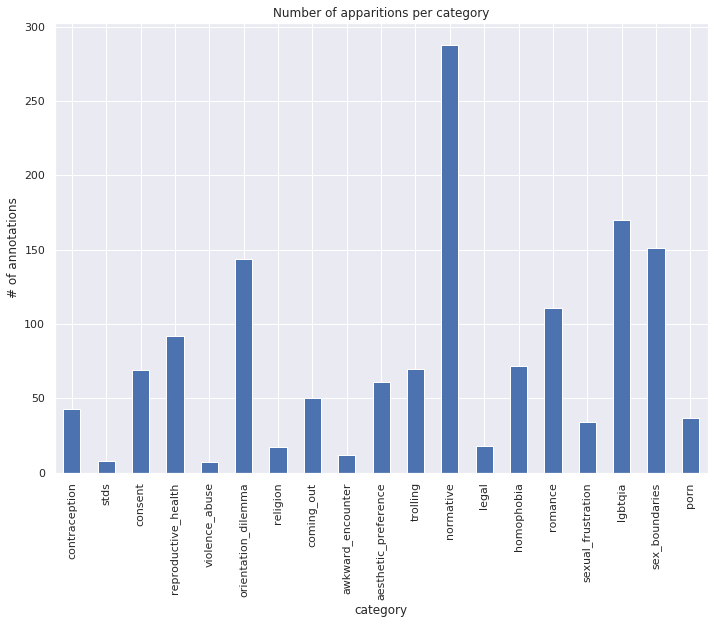

In [0]:
#plotiing the number of apparitions vs category
df_stats.plot(x='category', y='number_of_apparitions', kind='bar', legend=False, grid=True)
plt.title("Number of apparitions per category")
plt.ylabel('# of annotations', fontsize=12)
plt.xlabel('category', fontsize=12)

In [0]:
df.head()

,title,title_en_modif,title_en,description,description_en,date_posted,n_upvotes,n_downvotes,type,label,all_text_en,contraception,stds,consent,reproductive_health,violence_abuse,orientation_dilemma,religion,coming_out,awkward_encounter,aesthetic_preference,trolling,normative,legal,homophobia,romance,sexual_frustration,lgbtqia,sex_boundaries,porn
0,Jak zamówić prostytukę?,How to order a prostitute?,How to order prostytukę?,Na ulicy lub na stronie?,On the street or on the side?,NaN,0.0,0.0,questions_sex,"legal,consent",How to order prostytukę? On the street or on the side?,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,spam z partnerem. Muj partner chcie żebym zaczela brać tabletko antykoncepcyjne a ja nie chcie bo pragnę mieć dziecko. Ma 30 lat. A pater nie chcie mieć dziecka bo muwi ze było by więcej kłopotów. Pomuszce co mam zrobić?,spam with a partner. My partner wanted me to began to take contraceptive pills and I did not want to because I want to have a baby. I am 30 years old. My partner do not want to have a child and he says it would be more trouble. Tell me what to do?,spam with a partner. Muj partner wanted me began to take contraceptive tabletko and I did not want to because I want to have a baby. Have 30 years old. A pater not want to have a child because of muwi would be more trouble. Pomuszce what do I do?,Antykoncepcja,contraception,NaN,0.0,4.0,questions_sex,"contraception,consent",spam with a partner. Muj partner wanted me began to take contraceptive tabletko and I did not want to because I want to have a baby. Have 30 years old. A pater not want to have a child because of muwi would be more trouble. Pomuszce what do I do? contraception,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Co zrobić gdy kobieta osiągnie orgazm,What to do when a woman reaches orgasm,What to do when a woman reaches orgasm,,,NaN,0.0,0.0,questions_sex,sex_boundaries,What to do when a woman reaches orgasm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Czy przyłapaliście swoich rodziców na seksie?,Have you caught your parents on having sex?,Is przyłapaliście their parents about sex?,Ja tak i to było strasznie obrzydliwe. Była jakaś 2 w nocy i poszłam do lazienki siku. Dzwi moich rodzicow byly uchylone wiec tam zajrzalam i moja mama robila mojemu tacie loda a potem tata mamie minetke i wgl to było okropne. Na szczęscie mnie nie zauważyli ale i tak pamietam ten widok... Mialam wtedy 8 lat.,I am so terribly and it was disgusting. It was a 2 am and went to the bathroom to pee. Loa my parents were repealed so I looked in there and my mom my dad did the ice cream and then my dad and my mom peeking minetka it was awful. Fortunately I did not notice but I remember the sight ... when I was 8 years old.,NaN,0.0,1.0,questions_sex,awkward_encounter,Is przyłapaliście their parents about sex? I am so terribly and it was disgusting. It was a 2 am and went to the bathroom to pee. Loa my parents were repealed so I looked in there and my mom my dad did the ice cream and then my dad and my mom peeking minetka it was awful. Fortunately I did not notice but I remember the sight ... when I was 8 years old.,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Ile razy uprawiać sex w dniu,How many times to have sex in a day,How many times have sex on,Mam 18 lat na niby,I am 18 years like,04.01.2020,0.0,1.0,questions_sex,normative,How many times have sex on I am 18 years like,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
df.iloc[:,11:30]

,contraception,stds,consent,reproductive_health,violence_abuse,orientation_dilemma,religion,coming_out,awkward_encounter,aesthetic_preference,trolling,normative,legal,homophobia,romance,sexual_frustration,lgbtqia,sex_boundaries,porn
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6498,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6499,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
6500,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6501,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, '# of categories')

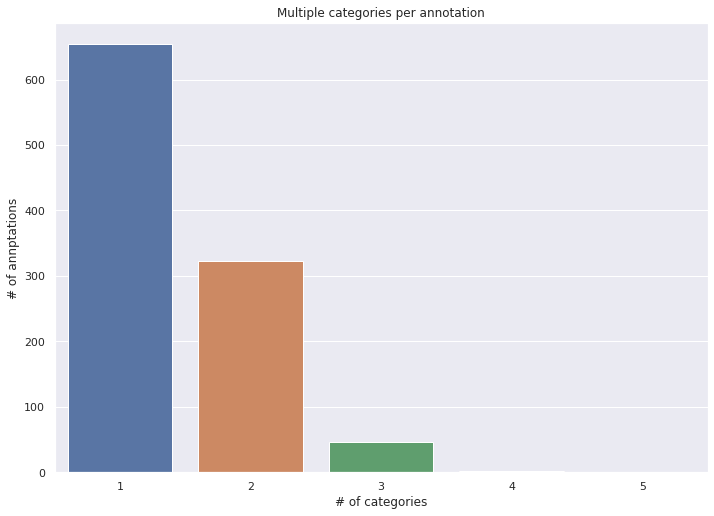

In [0]:
#Multiple categories per annotation
rowsums = df.iloc[:,11:30].sum(axis=1)
x=rowsums.value_counts()
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per annotation")
plt.ylabel('# of annptations', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

In [0]:
rowsums[rowsums == 0]

Series([], dtype: int64)

In [0]:
len(rowsums[rowsums == 3])


47

Using date_posted column 

In [46]:
select_cols = ['orientation_dilemma','consent','reproductive_health','sex_boundaries','normative']
df_w_dates =  df[pd.notna(df.date_posted)][select_cols+['date_posted']]
df_w_dates['datetime'] = pd.to_datetime(df_w_dates.date_posted)
df_w_dates['month'] = df_w_dates.datetime.apply(lambda x: x.month) 
df_w_dates['year'] = df_w_dates.datetime.apply(lambda x: x.year)
df_w_dates['month_year'] = df_w_dates.datetime.dt.to_period('M')
df_dates_grouped = df_w_dates.drop(columns=['month','year']).groupby(['month_year']).sum()
df_dates_grouped


,orientation_dilemma,consent,reproductive_health,sex_boundaries,normative
month_year,,,,,
2019-01,6,1,1,2,2
2019-02,3,1,2,2,8
2019-03,9,5,1,9,10
2019-04,3,1,3,1,5
2019-05,6,3,3,5,4
2019-06,17,4,5,11,17
2019-07,18,1,6,15,14
2019-08,38,23,24,56,59
2019-09,11,7,16,11,59


In [47]:
df_dates_grouped.columns
df_dates_grouped.head()

,orientation_dilemma,consent,reproductive_health,sex_boundaries,normative
month_year,,,,,
2019-01,6,1,1,2,2
2019-02,3,1,2,2,8
2019-03,9,5,1,9,10
2019-04,3,1,3,1,5
2019-05,6,3,3,5,4


In [0]:
melted_date_df = df_dates_grouped.reset_index().melt(id_vars = 'month_year', value_vars= select_cols)
melted_date_df[['month_year','value','variable']].set_index('month_year', inplace=True)

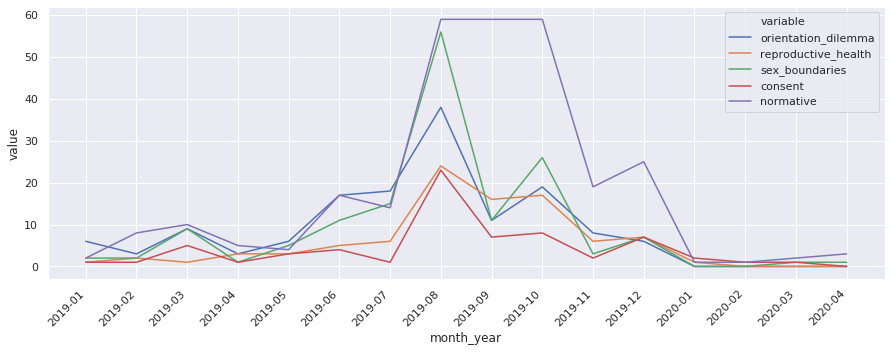

In [50]:
plt.figure(figsize=(15,5))
melted_date_df.sort_values(by='month_year', inplace=True)
melted_date_df.month_year = melted_date_df.month_year.astype('str')
chart = sns.lineplot(x = 'month_year', y='value', hue='variable', data= melted_date_df)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light'
)
plt.show()

#### Check statistical significance

In [51]:
melted_date_df.head()

,month_year,variable,value
0,2019-01,orientation_dilemma,6
32,2019-01,reproductive_health,1
48,2019-01,sex_boundaries,2
16,2019-01,consent,1
64,2019-01,normative,2


In [0]:
from scipy.stats import f, mannwhitneyu, shapiro, ttest_ind

def check_statistical_significance(variable_1, variable_2):
  # Create variables for groups
  group_a = melted_date_df[melted_date_df['variable'] == variable_1]['value']
  group_b = melted_date_df[melted_date_df['variable'] == variable_2]['value']
  alpha = 0.05


  # normality
  normality_group_a, normality_pvalue_a = shapiro(group_a)
  normality_group_b, normality_pvalue_b = shapiro(group_b)
  print('Shapiro group A p-value: ', normality_pvalue_a)
  print('Shapiro group B p-value: ', normality_pvalue_b)

  # variance
  F = np.var(group_a) / np.var(group_b)
  critical_value_group_a = len(group_a) - 1
  critical_value_group_b = len(group_b) - 1
  f_pvalue = f.cdf(F, critical_value_group_a, critical_value_group_b)
  print('F test p-value: ', f_pvalue)

  if normality_pvalue_a > alpha and normality_pvalue_b > alpha:
    if f_pvalue > alpha:
        # T-test
        ttest_pvalue = ttest_ind(group_a, group_b).pvalue
        print('T-test p-value: ', ttest_pvalue)
        print('Statistical significance: ', ttest_pvalue <= alpha)
    else:
        # Welch's test
        welch_pvalue = ttest_ind(group_a, group_b, equal_var=False).pvalue
        print('Welch p-value: ', welch_pvalue)
        print('Statistical significance: ', welch_pvalue <= alpha)
  else:
    # Mann-Whitney U test
    mannwhitneyu_pvalue = mannwhitneyu(group_a, group_b).pvalue
    print('Mann-Whitney U test: ', mannwhitneyu_pvalue)
    print('Statistical significance: ', mannwhitneyu_pvalue <= alpha)

In [53]:
melted_date_df['variable'].unique()

array(['orientation_dilemma', 'reproductive_health', 'sex_boundaries',
       'consent', 'normative'], dtype=object)

In [54]:
# Permutations of values
import itertools

variable_comb = list(itertools.permutations(['orientation_dilemma', 'reproductive_health', 'sex_boundaries',
       'consent', 'normative'], 2))
print(variable_comb)

[('orientation_dilemma', 'reproductive_health'), ('orientation_dilemma', 'sex_boundaries'), ('orientation_dilemma', 'consent'), ('orientation_dilemma', 'normative'), ('reproductive_health', 'orientation_dilemma'), ('reproductive_health', 'sex_boundaries'), ('reproductive_health', 'consent'), ('reproductive_health', 'normative'), ('sex_boundaries', 'orientation_dilemma'), ('sex_boundaries', 'reproductive_health'), ('sex_boundaries', 'consent'), ('sex_boundaries', 'normative'), ('consent', 'orientation_dilemma'), ('consent', 'reproductive_health'), ('consent', 'sex_boundaries'), ('consent', 'normative'), ('normative', 'orientation_dilemma'), ('normative', 'reproductive_health'), ('normative', 'sex_boundaries'), ('normative', 'consent')]


In [55]:
#Print values
for comb in variable_comb:
  variable_1 = comb[0]
  variable_2 = comb[1]
  print(variable_1, ' vs ', variable_2, ' - statistical significance: ', check_statistical_significance(variable_1, variable_2))

Shapiro group A p-value:  0.00465727224946022
Shapiro group B p-value:  0.0013161427341401577
F test p-value:  0.9019670005918443
Mann-Whitney U test:  0.161530425541642
Statistical significance:  False
orientation_dilemma  vs  reproductive_health  - statistical significance:  None
Shapiro group A p-value:  0.00465727224946022
Shapiro group B p-value:  6.222312367754057e-05
F test p-value:  0.0935034039235582
Mann-Whitney U test:  0.39546111637743353
Statistical significance:  False
orientation_dilemma  vs  sex_boundaries  - statistical significance:  None
Shapiro group A p-value:  0.00465727224946022
Shapiro group B p-value:  5.4091073252493516e-05
F test p-value:  0.984350160790549
Mann-Whitney U test:  0.09865649873460325
Statistical significance:  False
orientation_dilemma  vs  consent  - statistical significance:  None
Shapiro group A p-value:  0.00465727224946022
Shapiro group B p-value:  0.00040585623355582356
F test p-value:  0.0027102438103456306
Mann-Whitney U test:  0.153833

### Data augmentation
We have highly imbalanced data. Some categories are excessively present forming the majority group and suppressing the value of categories less in number constituting the minority group.

We have tried two approaches for data augmentation.
Primarily we have used Random Over Sampler Algorithm for over sampling the data.

Towards the end of the notebook a manual implementation using loops for data augmemtation is also there. 

However Random Over Sampler is more robust in a way that we did not really took account relations between labels. Our loop generated more than required labels but could not really predict it with our approach. It was just a trial to see how manual implementation performs.



##### Usage of Random Over Sampler for Sklearn models

In [0]:
df_ros = df.copy()

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MultiLabelBinarizer

#to encode labels MultiLabelBinarizer() is used
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df_ros['label'].str.split(','))
Y = multilabel_binarizer.transform(df_ros['label'].str.split(','))

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_ros['all_text_en'])

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [59]:
multilabel_binarizer.classes_

array(['', 'aesthetic_preference', 'awkward_encounter', 'coming_out',
       'consent', 'contraception', 'homophobia', 'legal', 'lgbtqia',
       'normative', 'orientation_dilemma', 'porn', 'religion',
       'reproductive_health', 'romance', 'sex_boundaries',
       'sexual_frustration', 'stds', 'trolling', 'violence_abuse'],
      dtype=object)

In [60]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=9000)
X_tfidf_resampled, Y_tfidf_resampled = ros.fit_sample(X_tfidf, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
#splitting the data
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf_resampled, Y_tfidf_resampled, test_size=0.2, random_state=9000)

##### Class weighting for TensorFlow/Keras models

In [0]:
df_weighted = df.copy()

In [0]:
df_weighted.label = df_weighted.label.str.split(',')

In [64]:
df_weighted.head()

,title,title_en_modif,title_en,description,description_en,date_posted,n_upvotes,n_downvotes,type,label,all_text_en,contraception,stds,consent,reproductive_health,violence_abuse,orientation_dilemma,religion,coming_out,awkward_encounter,aesthetic_preference,trolling,normative,legal,homophobia,romance,sexual_frustration,lgbtqia,sex_boundaries,porn
0,Jak zamówić prostytukę?,How to order a prostitute?,How to order prostytukę?,Na ulicy lub na stronie?,On the street or on the side?,NaN,0.0,0.0,questions_sex,"[legal, consent]",How to order prostytukę? On the street or on the side?,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,spam z partnerem. Muj partner chcie żebym zaczela brać tabletko antykoncepcyjne a ja nie chcie bo pragnę mieć dziecko. Ma 30 lat. A pater nie chcie mieć dziecka bo muwi ze było by więcej kłopotów. Pomuszce co mam zrobić?,spam with a partner. My partner wanted me to began to take contraceptive pills and I did not want to because I want to have a baby. I am 30 years old. My partner do not want to have a child and he says it would be more trouble. Tell me what to do?,spam with a partner. Muj partner wanted me began to take contraceptive tabletko and I did not want to because I want to have a baby. Have 30 years old. A pater not want to have a child because of muwi would be more trouble. Pomuszce what do I do?,Antykoncepcja,contraception,NaN,0.0,4.0,questions_sex,"[contraception, consent]",spam with a partner. Muj partner wanted me began to take contraceptive tabletko and I did not want to because I want to have a baby. Have 30 years old. A pater not want to have a child because of muwi would be more trouble. Pomuszce what do I do? contraception,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Co zrobić gdy kobieta osiągnie orgazm,What to do when a woman reaches orgasm,What to do when a woman reaches orgasm,,,NaN,0.0,0.0,questions_sex,[sex_boundaries],What to do when a woman reaches orgasm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Czy przyłapaliście swoich rodziców na seksie?,Have you caught your parents on having sex?,Is przyłapaliście their parents about sex?,Ja tak i to było strasznie obrzydliwe. Była jakaś 2 w nocy i poszłam do lazienki siku. Dzwi moich rodzicow byly uchylone wiec tam zajrzalam i moja mama robila mojemu tacie loda a potem tata mamie minetke i wgl to było okropne. Na szczęscie mnie nie zauważyli ale i tak pamietam ten widok... Mialam wtedy 8 lat.,I am so terribly and it was disgusting. It was a 2 am and went to the bathroom to pee. Loa my parents were repealed so I looked in there and my mom my dad did the ice cream and then my dad and my mom peeking minetka it was awful. Fortunately I did not notice but I remember the sight ... when I was 8 years old.,NaN,0.0,1.0,questions_sex,[awkward_encounter],Is przyłapaliście their parents about sex? I am so terribly and it was disgusting. It was a 2 am and went to the bathroom to pee. Loa my parents were repealed so I looked in there and my mom my dad did the ice cream and then my dad and my mom peeking minetka it was awful. Fortunately I did not notice but I remember the sight ... when I was 8 years old.,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Ile razy uprawiać sex w dniu,How many times to have sex in a day,How many times have sex on,Mam 18 lat na niby,I am 18 years like,04.01.2020,0.0,1.0,questions_sex,[normative],How many times have sex on I am 18 years like,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df_weighted.label)
labels = multilabel_binarizer.classes_

In [66]:
multilabel_binarizer.classes_

array(['', 'aesthetic_preference', 'awkward_encounter', 'coming_out',
       'consent', 'contraception', 'homophobia', 'legal', 'lgbtqia',
       'normative', 'orientation_dilemma', 'porn', 'religion',
       'reproductive_health', 'romance', 'sex_boundaries',
       'sexual_frustration', 'stds', 'trolling', 'violence_abuse'],
      dtype=object)

In [0]:
df_weighted.label = df_weighted.label.astype(str)

In [68]:
grouped_labels = df_weighted.groupby("label", sort='count').size().reset_index(name='count')
grouped_labels.label.describe()
#grouped_labels.head()

count     171                 
unique    171                 
top       ['legal', 'lgbtqia']
freq      1                   
Name: label, dtype: object

In [69]:
most_common_labels = grouped_labels.nlargest(171, columns="count")
df_weighted.label = df_weighted.label.apply(lambda label : label if label in most_common_labels.label.values else None)
df_weighted = df_weighted.dropna()
most_common_labels.head()
#df_weighted.head()

,label,count
83,['normative'],128
104,['orientation_dilemma'],82
62,['lgbtqia'],78
154,['sex_boundaries'],59
168,['trolling'],58


In [70]:
most_common_labels['class_weight'] = len(df_weighted) / most_common_labels['count']
    
most_common_labels

,label,count,class_weight
83,['normative'],128,7.757812
104,['orientation_dilemma'],82,12.109756
62,['lgbtqia'],78,12.730769
154,['sex_boundaries'],59,16.830508
168,['trolling'],58,17.120690
128,['reproductive_health'],40,24.825000
140,['romance'],39,25.461538
45,['homophobia'],39,25.461538
73,"['normative', 'lgbtqia']",29,34.241379
6,['aesthetic_preference'],27,36.777778


In [0]:
df_weighted_def = df_weighted.merge(most_common_labels)

In [0]:
df_weighted_def.to_csv('/content/gdrive/My Drive/Official folder Sexed challenge/Task4_1_forum_platforms_scraping/most_recent_data/weighted_data.csv')

##### Custom method with for loops and conditional statements

This approach is just for trial and does not need to be included.




In [0]:
#Tokenizing the text
def tokenize(text):
    tokenized =  sent_tokenize(text)
    return tokenized
    
#shuffling the tokens
def shuffle_tokenized(tokenized_text):
    np.random.shuffle(tokenized_text)
    new=list(tokenized_text)
    shuffled.append(new)
    return tokenized_text 

In [0]:
orig_df = df.copy()

raw_cols = list(set([j for i in orig_df.label for j in i.split(',')]))


for k,v in typo_dict.items():
  for idx, col in enumerate(raw_cols):
    raw_cols[idx] = re.sub(k,v,col)

In [74]:
raw_cols.remove('')

categories = raw_cols

print(orig_df.shape)

(1027, 30)


In [75]:
raw_cols

['reproductive_health',
 'stds',
 'trolling',
 'normative',
 'sexual_frustration',
 'sex_boundaries',
 'legal',
 'homophobia',
 'orientation_dilemma',
 'consent',
 'religion',
 'coming_out',
 'romance',
 'lgbtqia',
 'aesthetic_preference',
 'violence_abuse',
 'porn',
 'contraception',
 'awkward_encounter']

In [76]:
orig_encoded_df = orig_df.label.str.get_dummies(sep=',').reset_index()

print(orig_encoded_df.columns)
orig_encoded_df.head()

Index(['index', 'aesthetic_preference', 'awkward_encounter', 'coming_out',
       'consent', 'contraception', 'homophobia', 'legal', 'lgbtqia',
       'normative', 'orientation_dilemma', 'porn', 'religion',
       'reproductive_health', 'romance', 'sex_boundaries',
       'sexual_frustration', 'stds', 'trolling', 'violence_abuse'],
      dtype='object')


,index,aesthetic_preference,awkward_encounter,coming_out,consent,contraception,homophobia,legal,lgbtqia,normative,orientation_dilemma,porn,religion,reproductive_health,romance,sex_boundaries,sexual_frustration,stds,trolling,violence_abuse
0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [77]:
orig_w_encoded = pd.merge(orig_df.reset_index(),orig_encoded_df, how='left', on='index')
orig_w_encoded.drop(columns=['index'], inplace=True)
orig_w_encoded.head()

,title,title_en_modif,title_en,description,description_en,date_posted,n_upvotes,n_downvotes,type,label,all_text_en,contraception_x,stds_x,consent_x,reproductive_health_x,violence_abuse_x,orientation_dilemma_x,religion_x,coming_out_x,awkward_encounter_x,aesthetic_preference_x,trolling_x,normative_x,legal_x,homophobia_x,romance_x,sexual_frustration_x,lgbtqia_x,sex_boundaries_x,porn_x,aesthetic_preference_y,awkward_encounter_y,coming_out_y,consent_y,contraception_y,homophobia_y,legal_y,lgbtqia_y,normative_y,orientation_dilemma_y,porn_y,religion_y,reproductive_health_y,romance_y,sex_boundaries_y,sexual_frustration_y,stds_y,trolling_y,violence_abuse_y
0,Jak zamówić prostytukę?,How to order a prostitute?,How to order prostytukę?,Na ulicy lub na stronie?,On the street or on the side?,NaN,0.0,0.0,questions_sex,"legal,consent",How to order prostytukę? On the street or on the side?,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,spam z partnerem. Muj partner chcie żebym zaczela brać tabletko antykoncepcyjne a ja nie chcie bo pragnę mieć dziecko. Ma 30 lat. A pater nie chcie mieć dziecka bo muwi ze było by więcej kłopotów. Pomuszce co mam zrobić?,spam with a partner. My partner wanted me to began to take contraceptive pills and I did not want to because I want to have a baby. I am 30 years old. My partner do not want to have a child and he says it would be more trouble. Tell me what to do?,spam with a partner. Muj partner wanted me began to take contraceptive tabletko and I did not want to because I want to have a baby. Have 30 years old. A pater not want to have a child because of muwi would be more trouble. Pomuszce what do I do?,Antykoncepcja,contraception,NaN,0.0,4.0,questions_sex,"contraception,consent",spam with a partner. Muj partner wanted me began to take contraceptive tabletko and I did not want to because I want to have a baby. Have 30 years old. A pater not want to have a child because of muwi would be more trouble. Pomuszce what do I do? contraception,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Co zrobić gdy kobieta osiągnie orgazm,What to do when a woman reaches orgasm,What to do when a woman reaches orgasm,,,NaN,0.0,0.0,questions_sex,sex_boundaries,What to do when a woman reaches orgasm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Czy przyłapaliście swoich rodziców na seksie?,Have you caught your parents on having sex?,Is przyłapaliście their parents about sex?,Ja tak i to było strasznie obrzydliwe. Była jakaś 2 w nocy i poszłam do lazienki siku. Dzwi moich rodzicow byly uchylone wiec tam zajrzalam i moja mama robila mojemu tacie loda a potem tata mamie minetke i wgl to było okropne. Na szczęscie mnie nie zauważyli ale i tak pamietam ten widok... Mialam wtedy 8 lat.,I am so terribly and it was disgusting. It was a 2 am and went to the bathroom to pee. Loa my parents were repealed so I looked in there and my mom my dad did the ice cream and then my dad and my mom peeking minetka it was awful. Fortunately I did not notice but I remember the sight ... when I was 8 years old.,NaN,0.0,1.0,questions_sex,awkward_encounter,Is przyłapaliście their parents about sex? I am so terribly and it was disgusting. It was a 2 am and went to the bathroom to pee. Loa my parents were repealed so I looked in there and my mom my dad did the ice cream and then my dad and my mom peeking minetka it was awful. Fortunately I did not notice but I remember the sight ... when I was 8 years old.,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Ile razy uprawiać sex w dniu,How many times to have sex in a day,How many times have sex on,Mam 18 lat na niby,I am 18 years like,04.01.2020,0.0,1.0,questions_sex,normative,How many times have sex on I am 18 years like,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Augment and pick monolabel and multilabel samples

In [78]:
#combining mono and multi labels

df_augm=orig_w_encoded
labels=df_augm.label
labels=np.array(labels)
length=[]
for l in labels:
   length.append(len(l.split(',')))
df_augm['length']=length

df_augm.head()

,title,title_en_modif,title_en,description,description_en,date_posted,n_upvotes,n_downvotes,type,label,all_text_en,contraception_x,stds_x,consent_x,reproductive_health_x,violence_abuse_x,orientation_dilemma_x,religion_x,coming_out_x,awkward_encounter_x,aesthetic_preference_x,trolling_x,normative_x,legal_x,homophobia_x,romance_x,sexual_frustration_x,lgbtqia_x,sex_boundaries_x,porn_x,aesthetic_preference_y,awkward_encounter_y,coming_out_y,consent_y,contraception_y,homophobia_y,legal_y,lgbtqia_y,normative_y,orientation_dilemma_y,porn_y,religion_y,reproductive_health_y,romance_y,sex_boundaries_y,sexual_frustration_y,stds_y,trolling_y,violence_abuse_y,length
0,Jak zamówić prostytukę?,How to order a prostitute?,How to order prostytukę?,Na ulicy lub na stronie?,On the street or on the side?,NaN,0.0,0.0,questions_sex,"legal,consent",How to order prostytukę? On the street or on the side?,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2
1,spam z partnerem. Muj partner chcie żebym zaczela brać tabletko antykoncepcyjne a ja nie chcie bo pragnę mieć dziecko. Ma 30 lat. A pater nie chcie mieć dziecka bo muwi ze było by więcej kłopotów. Pomuszce co mam zrobić?,spam with a partner. My partner wanted me to began to take contraceptive pills and I did not want to because I want to have a baby. I am 30 years old. My partner do not want to have a child and he says it would be more trouble. Tell me what to do?,spam with a partner. Muj partner wanted me began to take contraceptive tabletko and I did not want to because I want to have a baby. Have 30 years old. A pater not want to have a child because of muwi would be more trouble. Pomuszce what do I do?,Antykoncepcja,contraception,NaN,0.0,4.0,questions_sex,"contraception,consent",spam with a partner. Muj partner wanted me began to take contraceptive tabletko and I did not want to because I want to have a baby. Have 30 years old. A pater not want to have a child because of muwi would be more trouble. Pomuszce what do I do? contraception,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,Co zrobić gdy kobieta osiągnie orgazm,What to do when a woman reaches orgasm,What to do when a woman reaches orgasm,,,NaN,0.0,0.0,questions_sex,sex_boundaries,What to do when a woman reaches orgasm,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,Czy przyłapaliście swoich rodziców na seksie?,Have you caught your parents on having sex?,Is przyłapaliście their parents about sex?,Ja tak i to było strasznie obrzydliwe. Była jakaś 2 w nocy i poszłam do lazienki siku. Dzwi moich rodzicow byly uchylone wiec tam zajrzalam i moja mama robila mojemu tacie loda a potem tata mamie minetke i wgl to było okropne. Na szczęscie mnie nie zauważyli ale i tak pamietam ten widok... Mialam wtedy 8 lat.,I am so terribly and it was disgusting. It was a 2 am and went to the bathroom to pee. Loa my parents were repealed so I looked in there and my mom my dad did the ice cream and then my dad and my mom peeking minetka it was awful. Fortunately I did not notice but I remember the sight ... when I was 8 years old.,NaN,0.0,1.0,questions_sex,awkward_encounter,Is przyłapaliście their parents about sex? I am so terribly and it was disgusting. It was a 2 am and went to the bathroom to pee. Loa my parents were repealed so I looked in there and my mom my dad did the ice cream and then my dad and my mom peeking minetka it was awful. Fortunately I did not notice but I remember the sight ... when I was 8 years old.,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Ile razy uprawiać sex w dniu,How many times to have sex in a day,How many times have sex on,Mam 18 lat na niby,I am 18 years like,04.01.2020,0.0,1.0,questions_sex,normative,How many times have sex on I am 18 years like,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [0]:
mono=[]
mono_l=[]
multi=[]
multi_l=[]

for i,row in df_augm.iterrows():
  if df_augm.length[i]<2:
     mono.append(row['all_text_en'])
     mono_l.append(row['label'])
  else:
    multi.append(row['all_text_en'])
    multi_l.append(row['label'])

In [0]:
mono_df=pd.DataFrame(list(zip(mono,mono_l)),columns=['text','label'])
multi_df=pd.DataFrame(list(zip(multi,multi_l)),columns=['text','label'])

In [82]:
mono_df.head()

,text,label
0,What to do when a woman reaches orgasm,sex_boundaries
1,Is przyłapaliście their parents about sex? I am so terribly and it was disgusting. It was a 2 am and went to the bathroom to pee. Loa my parents were repealed so I looked in there and my mom my dad did the ice cream and then my dad and my mom peeking minetka it was awful. Fortunately I did not notice but I remember the sight ... when I was 8 years old.,awkward_encounter
2,How many times have sex on I am 18 years like,normative
3,A few pytanek 1) Do you masturbate 2) how often do you do it 3) what you are doing 4) Have you ever figured 5) you are guy or girls,normative
4,"Do you spend the night with Alicja Bachleda-Curus? It excites me very much, especially her legs :) What it say?",porn


In [83]:
multi_df.head()

,text,label
0,How to order prostytukę? On the street or on the side?,"legal,consent"
1,spam with a partner. Muj partner wanted me began to take contraceptive tabletko and I did not want to because I want to have a baby. Have 30 years old. A pater not want to have a child because of muwi would be more trouble. Pomuszce what do I do? contraception,"contraception,consent"
2,Is it a fetish? I read while masturbating himself with some really hot sexach because thanks to faster and have a more enjoyable orgasm. Is it a fetish?,"normative,sex_boundaries"
3,What is the appropriate age for the first time?,"consent,normative,sex_boundaries"
4,"I need advice, support, reviews Hello. I'm 16 years old. The last time with my boyfriend (to 18 years) slept together (we drank a lot). It was my first time. The problem lies in the fact that we did it without any protection, but not dropped in me. I am afraid that I might be pregnant. I'm not ready for this, especially in this age. I know that those concerns arose solely from my stupidity. I need your help and maybe advice or opinion, because I no longer know what to do. Can I get pregnant and if so, what is the probability. Please do not hejtujcie, I know I did stupidity and that is why I want to help you","romance,normative"


In [84]:
grouped_labels = mono_df.groupby("label", sort='count').size().reset_index(name='count')
grouped_labels.label.describe()

count     17               
unique    17               
top       awkward_encounter
freq      1                
Name: label, dtype: object

In [85]:
grouped_labels.head()

,label,count
0,aesthetic_preference,27
1,awkward_encounter,6
2,coming_out,25
3,consent,17
4,contraception,21


In [0]:
most_common_labels = grouped_labels.nlargest(17, columns="count")
mono_df.label = mono_df.label.apply(lambda label : label if label in most_common_labels.label.values else None)
mono_df = mono_df.dropna()

In [89]:
grouped_labels.head()

,label,count
0,aesthetic_preference,27
1,awkward_encounter,6
2,coming_out,25
3,consent,17
4,contraception,21


In [90]:
most_common_labels['class_weight'] = len(mono_df) / most_common_labels['count']
most_common_labels

,label,count,class_weight
8,normative,128,5.093750
9,orientation_dilemma,82,7.951220
7,lgbtqia,78,8.358974
13,sex_boundaries,59,11.050847
15,trolling,58,11.241379
11,reproductive_health,40,16.300000
12,romance,39,16.717949
5,homophobia,39,16.717949
0,aesthetic_preference,27,24.148148
2,coming_out,25,26.080000


In [0]:
mono_df_def = mono_df.merge(most_common_labels)

In [0]:
mono_df_def = mono_df_def.sample(frac=0.5, weights='class_weight')

In [0]:
mono_df_def = mono_df_def.drop(['class_weight', 'count'], axis=1)

In [0]:
# selecting all multi labelled value
final_df = pd.concat([mono_df_def, multi_df],axis=0)

In [95]:
final_df.head()

,text,label
296,Or engaging in oral sex could get pregnant? Last uprawialismy with her boyfriend for the first time after oral sex on her panties was a little blood every time I had a period of time I have not so far although I should have early on Saturday of the week and feel well.,reproductive_health
222,I lay with my girlfriend Assistance was lying with his girlfriend and do not know how I talked to ... sex. Indeed already many times that we did together but she always came out with the initiative and now it wants but I do not want to be Nachle. What should I do!?,consent
207,What do you recommend to sex sites,porn
60,Przylapalaiscie once someone on the sex or masturbation?,awkward_encounter
343,How many cm is your penis and how many years you have I have 14 years and 16 cm only pls no joke;),aesthetic_preference


In [96]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 296 to 374
Data columns (total 2 columns):
text     701 non-null object
label    701 non-null object
dtypes: object(2)
memory usage: 16.4+ KB


In [0]:
df_augm_def =final_df
contraception = df_augm_def[df_augm_def['label'].str.contains('contraception')]
stds = df_augm_def[df_augm_def['label'].str.contains('stds')]
consent = df_augm_def[df_augm_def['label'].str.contains('consent')]
reproductive_health = df_augm_def[df_augm_def['label'].str.contains('health')]
violence_abuse = df_augm_def[df_augm_def['label'].str.contains('violence')]
orientation_dilemma = df_augm_def[df_augm_def['label'].str.contains('orientation')]
religion = df_augm_def[df_augm_def['label'].str.contains('religion')]
coming_out = df_augm_def[df_augm_def['label'].str.contains('coming')]
awkward_encounter = df_augm_def[df_augm_def['label'].str.contains('encounter')]
aesthetic_preference = df_augm_def[df_augm_def['label'].str.contains('preference')]
trolling = df_augm_def[df_augm_def['label'].str.contains('trolling')]
normative = df_augm_def[df_augm_def['label'].str.contains('norm')]
legal = df_augm_def[df_augm_def['label'].str.contains('legal')]
homophobia = df_augm_def[df_augm_def['label'].str.contains('homophobia')]
romance = df_augm_def[df_augm_def['label'].str.contains('romance')]
sexual_frustration = df_augm_def[df_augm_def['label'].str.contains('sexual_frustration')]
lgbtqia = df_augm_def[df_augm_def['label'].str.contains('lgbtqia')]
safe_sex = df_augm_def[df_augm_def['label'].str.contains('safe')]
sex_boundaries = df_augm_def[df_augm_def['label'].str.contains('boundaries')]
porn = df_augm_def[df_augm_def['label'].str.contains('por')]

df_augm_def.loc[contraception.index, 'contraception']=1
df_augm_def.loc[df_augm_def['contraception'].isna(), 'contraception'] = 0
df_augm_def.loc[stds.index, 'stds']=1
df_augm_def.loc[df_augm_def['stds'].isna(), 'stds'] = 0
df_augm_def.loc[consent.index, 'consent']=1
df_augm_def.loc[df_augm_def['consent'].isna(), 'consent'] = 0
df_augm_def.loc[reproductive_health.index, 'reproductive_health']=1
df_augm_def.loc[df_augm_def['reproductive_health'].isna(), 'reproductive_health'] = 0
df_augm_def.loc[violence_abuse.index, 'violence_abuse']=1
df_augm_def.loc[df_augm_def['violence_abuse'].isna(), 'violence_abuse'] = 0
df_augm_def.loc[orientation_dilemma.index, 'orientation_dilemma']=1
df_augm_def.loc[df_augm_def['orientation_dilemma'].isna(), 'orientation_dilemma'] = 0
df_augm_def.loc[religion.index, 'religion']=1
df_augm_def.loc[df_augm_def['religion'].isna(), 'religion'] = 0
df_augm_def.loc[coming_out.index, 'coming_out']=1
df_augm_def.loc[df_augm_def['coming_out'].isna(), 'coming_out'] = 0
df_augm_def.loc[awkward_encounter.index, 'awkward_encounter']=1
df_augm_def.loc[df_augm_def['awkward_encounter'].isna(), 'awkward_encounter'] = 0
df_augm_def.loc[aesthetic_preference.index, 'aesthetic_preference']=1
df_augm_def.loc[df_augm_def['aesthetic_preference'].isna(), 'aesthetic_preference'] = 0
df_augm_def.loc[trolling.index, 'trolling']=1
df_augm_def.loc[df_augm_def['trolling'].isna(), 'trolling'] = 0
df_augm_def.loc[normative.index, 'normative']=1
df_augm_def.loc[df_augm_def['normative'].isna(), 'normative'] = 0
df_augm_def.loc[legal.index, 'legal']=1
df_augm_def.loc[df_augm_def['legal'].isna(), 'legal'] = 0
df_augm_def.loc[homophobia.index, 'homophobia']=1
df_augm_def.loc[df_augm_def['homophobia'].isna(), 'homophobia'] = 0
df_augm_def.loc[romance.index, 'romance']=1
df_augm_def.loc[df_augm_def['romance'].isna(), 'romance'] = 0
df_augm_def.loc[sexual_frustration.index, 'sexual_frustration']=1
df_augm_def.loc[df_augm_def['sexual_frustration'].isna(), 'sexual_frustration'] = 0
df_augm_def.loc[lgbtqia.index, 'lgbtqia']=1
df_augm_def.loc[df_augm_def['lgbtqia'].isna(), 'lgbtqia'] = 0
df_augm_def.loc[sex_boundaries.index, 'sex_boundaries']=1
df_augm_def.loc[df_augm_def['sex_boundaries'].isna(), 'sex_boundaries'] = 0
df_augm_def.loc[porn.index, 'porn']=1
df_augm_def.loc[df_augm_def['porn'].isna(), 'porn'] = 0

In [98]:
df_augm_def.head()

,text,label,contraception,stds,consent,reproductive_health,violence_abuse,orientation_dilemma,religion,coming_out,awkward_encounter,aesthetic_preference,trolling,normative,legal,homophobia,romance,sexual_frustration,lgbtqia,sex_boundaries,porn
296,Or engaging in oral sex could get pregnant? Last uprawialismy with her boyfriend for the first time after oral sex on her panties was a little blood every time I had a period of time I have not so far although I should have early on Saturday of the week and feel well.,reproductive_health,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
222,I lay with my girlfriend Assistance was lying with his girlfriend and do not know how I talked to ... sex. Indeed already many times that we did together but she always came out with the initiative and now it wants but I do not want to be Nachle. What should I do!?,consent,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
207,What do you recommend to sex sites,porn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
60,Przylapalaiscie once someone on the sex or masturbation?,awkward_encounter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,How many cm is your penis and how many years you have I have 14 years and 16 cm only pls no joke;),aesthetic_preference,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
labels_sexed = df_augm_def.drop(['text', 'label'], axis=1)

counts = []
categories = list(labels_sexed.columns.values)


for i in categories:
    counts.append((i, labels_sexed[i].sum()))

df_stats = pd.DataFrame(counts, columns=['category', 'number_of_apparitions'])
df_stats

,category,number_of_apparitions
0,contraception,47.0
1,stds,11.0
2,consent,108.0
3,reproductive_health,129.0
4,violence_abuse,7.0
5,orientation_dilemma,133.0
6,religion,23.0
7,coming_out,58.0
8,awkward_encounter,22.0
9,aesthetic_preference,85.0


Text(0.5, 0, 'category')

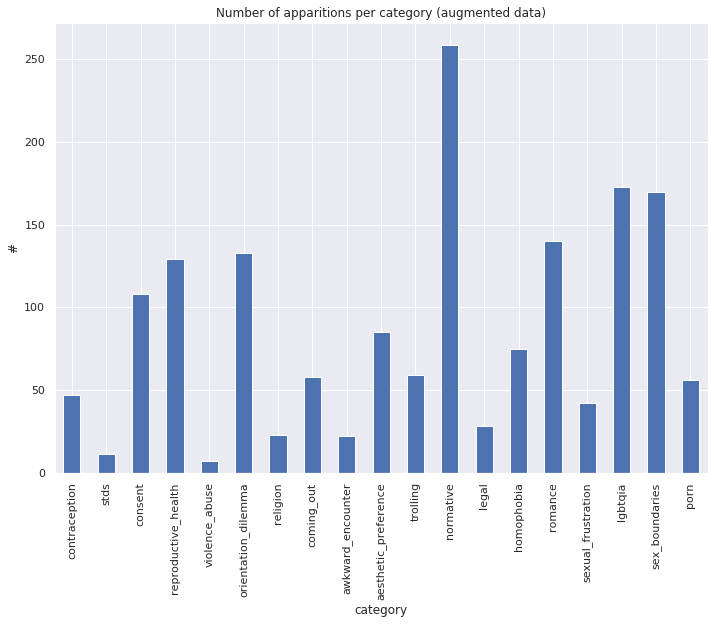

In [100]:
df_stats.plot(x='category', y='number_of_apparitions', kind='bar', legend=False, grid=True)
plt.title("Number of apparitions per category (augmented data)")
plt.ylabel('#', fontsize=12)
plt.xlabel('category', fontsize=12)

In [0]:
def shuffling(lbl, nb):
  for i in range(int(nb/len(lbl))):
        shuffle_tokenized(shuffled[-1])

In [102]:
augm_df = pd.DataFrame()
for label in categories:
  augmented = []
  reps=[]
  curr_label = df_augm_def[df_augm_def[str(label)]==1]

  for cl in curr_label.iterrows():
    txt = cl[1]['text']
    tok = tokenize(str(txt))
    shuffled= [tok]
    if len(curr_label) <=15:
      shuffling(curr_label, 3800)
    elif len(curr_label) > 15 and len(curr_label) <=30:
      shuffling(curr_label, 3500)
    elif len(curr_label) > 30 and len(curr_label) <=50:
      shuffling(curr_label, 3000) 
    elif len(curr_label) >50 and len(curr_label)<=80:
      shuffling(curr_label, 2800)
    elif len(curr_label) >80 and len(curr_label)<=100:
      shuffling(curr_label, 2500)  
    elif len(curr_label) >100 and len(curr_label)<=150:
      shuffling(curr_label, 2000)
    elif len(curr_label) >120 and len(curr_label)<150:
      shuffling(curr_label, 1800)  
    elif len(curr_label) >150 and len(curr_label)<=180:
      shuffling(curr_label, 1500)      
    else:
      shuffling(curr_label, 1200)
    for k in shuffled:
      s = ' '
      new_txt = s.join(k)
      if new_txt not in augmented:
          augmented.append(new_txt)
      else:
          reps.append(new_txt)
  add_dict = {'index': cl[0],'text':[i for i in augmented], label :1}
  add_dict.update({cat:0 for cat in categories if cat != label })
  augm_df = pd.concat([augm_df, pd.\
                        DataFrame(add_dict)])
  
augm_grouped_df = augm_df.groupby('index').max().reset_index()

categories2 = [cat for cat in categories if cat not in ['advice','sexual_experience','experience','none','safe_sex']]

augm_complete_df = pd.merge(augm_df[['index','text']], augm_grouped_df[['index']+categories2], how = 'left', on='index')
len(augm_complete_df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



16312

Visualization of the results of the augmentation loop

In [103]:
augm_complete_df.shape

(16312, 21)

In [104]:
augm_complete_df.columns

Index(['index', 'text', 'contraception', 'stds', 'consent',
       'reproductive_health', 'violence_abuse', 'orientation_dilemma',
       'religion', 'coming_out', 'awkward_encounter', 'aesthetic_preference',
       'trolling', 'normative', 'legal', 'homophobia', 'romance',
       'sexual_frustration', 'lgbtqia', 'sex_boundaries', 'porn'],
      dtype='object')

In [105]:
labels_sexed = augm_complete_df.drop(['index', 'text'], axis=1)

counts = []
categories = list(labels_sexed.columns.values)


for i in categories:
    counts.append((i, labels_sexed[i].sum()))

df_stats = pd.DataFrame(counts, columns=['category', 'number_of_apparitions'])
df_stats

,category,number_of_apparitions
0,contraception,2278
1,stds,2278
2,consent,728
3,reproductive_health,1825
4,violence_abuse,670
5,orientation_dilemma,2025
6,religion,2419
7,coming_out,2025
8,awkward_encounter,1194
9,aesthetic_preference,776


Text(0.5, 0, 'category')

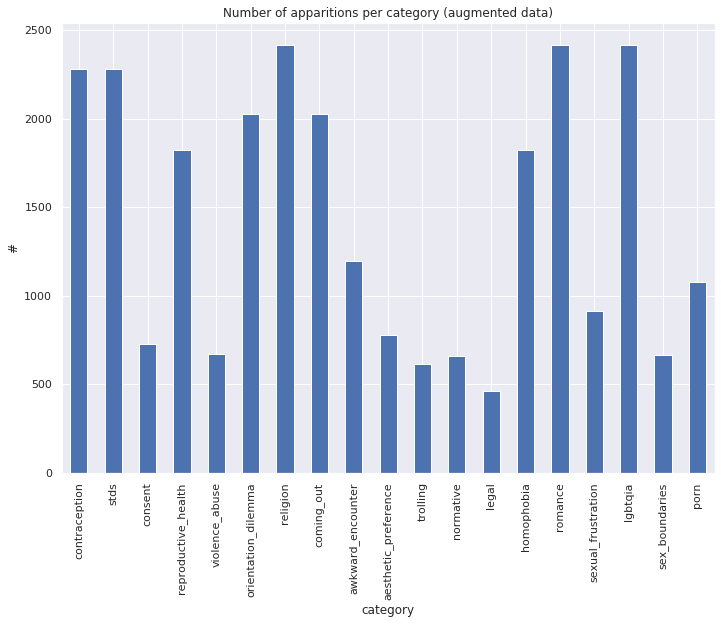

In [106]:
df_stats.plot(x='category', y='number_of_apparitions', kind='bar', legend=False, grid=True)
plt.title("Number of apparitions per category (augmented data)")
plt.ylabel('#', fontsize=12)
plt.xlabel('category', fontsize=12)

In [107]:
augm_complete_df.head()

,index,text,contraception,stds,consent,reproductive_health,violence_abuse,orientation_dilemma,religion,coming_out,awkward_encounter,aesthetic_preference,trolling,normative,legal,homophobia,romance,sexual_frustration,lgbtqia,sex_boundaries,porn
0,160,How to masturbate ?! What do you masturbate? I used probably all the ideas so you can wymiślić something unusual xD,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,160,What do you masturbate? I used probably all the ideas so you can wymiślić something unusual xD How to masturbate ?!,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,160,How to masturbate ?! I used probably all the ideas so you can wymiślić something unusual xD What do you masturbate?,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,160,What do you masturbate? How to masturbate ?! I used probably all the ideas so you can wymiślić something unusual xD,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,160,I used probably all the ideas so you can wymiślić something unusual xD How to masturbate ?! What do you masturbate?,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [108]:
len(augm_complete_df)

16312

In [0]:
augm_complete_df.to_csv('/content/gdrive/My Drive/Official folder Sexed challenge/Task4_1_forum_platforms_scraping/most_recent_data/augmented_data_multilabel.csv')